In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('tweets.csv',encoding='ISO-8859-1',names=[
    'target',
    'id',
    'date',
    'flag',
    'user',
    'text'
])

In [3]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
print(df.shape)
print(df.info())

(1600000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [5]:
df.target.unique()

array([0, 4], dtype=int64)

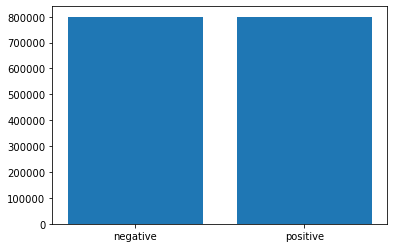

In [6]:
classes=df.target.unique()
counts=[]
for i in classes:
    count = len(df[df.target == i])
    counts.append(count)
plt.bar(['negative','positive'],counts)    
plt.show()

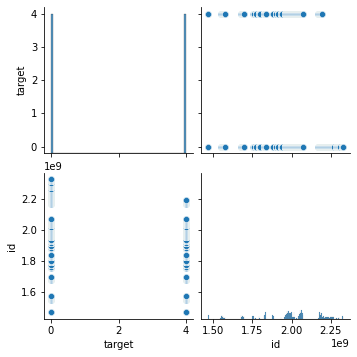

In [7]:
sb.pairplot(df)

## splitting the dataset 

In [8]:
x = df.text.values
y = df.target.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)


## Vectorize 

In [9]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [10]:
print('First tweets : \n')
print('Before vectorizing :',x_train[0],'\n After vectorizing',X_train[0])

First tweets : 

Before vectorizing : It was rainy and cloudy in the Windy City today &amp; WF customers had some serious SAD issues! I'm with them, when is summer coming?  
 After vectorizing   (0, 56126)	1
  (0, 57443)	1
  (0, 126950)	1
  (0, 129399)	1
  (0, 132544)	1
  (0, 142868)	1
  (0, 226851)	1
  (0, 251981)	1
  (0, 256885)	1
  (0, 257700)	1
  (0, 257841)	1
  (0, 433424)	1
  (0, 455284)	1
  (0, 467402)	1
  (0, 486023)	1
  (0, 501487)	1
  (0, 517082)	1
  (0, 519964)	1
  (0, 528707)	1
  (0, 558260)	1
  (0, 561897)	1
  (0, 562752)	1
  (0, 565913)	1
  (0, 566694)	1


In [11]:
import re
d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"

#clean up the string
s = x_train[0]
s = ' '.join(w for w in re.split("["+"\\".join(d)+"]",s) if w)

for i in s.split():
    if len(i)>1: print(i,vectorizer.vocabulary_[i.lower()])

It 257841
was 558260
rainy 433424
and 57443
cloudy 129399
in 251981
the 517082
Windy 565913
City 126950
today 528707
amp 56126
WF 561897
customers 142868
had 226851
some 486023
serious 467402
SAD 455284
issues 257700
with 566694
them 519964
when 562752
is 256885
summer 501487
coming 132544


In [12]:
d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"


"[,\\.\\!\\?\\/\\&\\-\\:\\;\\@\\'\\.\\.\\.]"

In [13]:
x_train[0]

"It was rainy and cloudy in the Windy City today &amp; WF customers had some serious SAD issues! I'm with them, when is summer coming? "

In [14]:
[w for w in re.split("["+"\\".join(d)+"]",s)]

['It was rainy and cloudy in the Windy City today  amp  WF customers had some serious SAD issues  I m with them  when is summer coming  ']

In [17]:
' '.join(w for w in re.split("["+"\\".join(d)+"]",s) if w)

'It was rainy and cloudy in the Windy City today  amp  WF customers had some serious SAD issues  I m with them  when is summer coming  '

## Building the Model

In [18]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

C:\Users\dellc\snake\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [19]:
score = classifier.score(X_test,y_test)
print('Accuracy:',score)

Accuracy: 0.8002875


## confusion_matrix 

In [20]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred,labels=df.target.unique())
df_cm = pd.DataFrame(cm,index=df.target.unique(),columns = df.target.unique())
df_cm

,0,4
0,126493,33828
4,30080,129599


### To view it as a percentage expression

In [21]:
df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
    df_cm_percentage[i]/=df_cm_percentage[i].sum()
    
df_cm_percentage    
    

,0,4
0,0.807885,0.206992
4,0.192115,0.793008


## Testing

In [26]:
tweet = 'ah, congrats mr fletcher for finally twitter'
vectTweet = vectorizer.transform(np.array([tweet]))

prediction = classifier.predict(vectTweet)
print('Tweet is', 'psitive' if prediction[0]==4 else 'negative')

Tweet is psitive


In [27]:
tweetList = ['Best tweet ever!','Mondays are the worst...']
vectTweet = vectorizer.transform(np.array(tweetList))

prediction = classifier.predict(vectTweet)
for enum, i in enumerate(tweetList):
    print(i, '| This tweet is','positive' if prediction[enum]==4 else 'negative')

Best tweet ever! | This tweet is positive
Mondays are the worst... | This tweet is negative
